# RGB-Kanäle und Pixelwerte in Binder
Dieses Notebook
- lädt ein Bild aus dem Internet, 
- zeigt die RGB-Kanäle nebeneinander und 
- visualisiert einen Pixel-Patch (z.B. 10×10) mit den RGB-Werten in jeder Rasterzelle.

Ändere einfach die `IMAGE_URL` in der entsprechenden Zelle und führe die Zellen von oben nach unten aus.

## 1. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

## 2. Hilfsfunktion: Bild von URL laden

In [3]:
def load_image_from_url(url):
    """Lädt ein Bild von einer URL und gibt ein PIL-Image im RGB-Format
    sowie das zugehörige NumPy-Array zurück."""
    response = requests.get(url)
    response.raise_for_status()
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img, np.array(img)

## 3. Funktion: RGB-Kanäle nebeneinander plotten

In [4]:
def plot_rgb_channels_from_array(img_arr, bw=False):
    """Zeigt ein Bild (als NumPy-Array) und seine RGB-Kanäle nebeneinander.
    
    Parameter
    ---------
    img_arr : np.ndarray
        Bild als NumPy-Array der Form (H, W, 3) im RGB-Format.
    bw : bool, optional (default: False)
        False -> Kanäle farbig anzeigen (jeweils nur ein Kanal aktiv).
        True  -> Kanäle in Graustufen anzeigen.
    """
    if img_arr.ndim != 3 or img_arr.shape[2] != 3:
        raise ValueError("img_arr muss die Form (H, W, 3) haben (RGB-Bild).")
    
    R = img_arr[:, :, 0]
    G = img_arr[:, :, 1]
    B = img_arr[:, :, 2]

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(img_arr)
    axes[0].set_title("Original")
    axes[0].axis("off")

    if bw:
        axes[1].imshow(R, cmap="gray")
        axes[1].set_title("Roter Kanal (BW)")
        axes[1].axis("off")

        axes[2].imshow(G, cmap="gray")
        axes[2].set_title("Grüner Kanal (BW)")
        axes[2].axis("off")

        axes[3].imshow(B, cmap="gray")
        axes[3].set_title("Blauer Kanal (BW)")
        axes[3].axis("off")
    else:
        zeros = np.zeros_like(R)
        img_R = np.dstack((R, zeros, zeros))
        img_G = np.dstack((zeros, G, zeros))
        img_B = np.dstack((zeros, zeros, B))

        axes[1].imshow(img_R)
        axes[1].set_title("Roter Kanal")
        axes[1].axis("off")

        axes[2].imshow(img_G)
        axes[2].set_title("Grüner Kanal")
        axes[2].axis("off")

        axes[3].imshow(img_B)
        axes[3].set_title("Blauer Kanal")
        axes[3].axis("off")

    plt.tight_layout()
    plt.show()

## 4. Funktion: Patch mit RGB-Werten visualisieren

In [5]:
def plot_patch_with_rgb_values(img_arr, x0=0, y0=0, patch_size=10, figsize=(6, 6)):
    """Schneidet einen Patch (standardmäßig 10x10) ab (x0,y0) aus einem Bild
    und plottet ihn als Raster. In jeder Rasterzelle stehen die RGB-Werte.
    
    Parameter
    ---------
    img_arr : np.ndarray
        Bild als NumPy-Array der Form (H, W, 3) im RGB-Format.
    x0, y0 : int, optional
        Startkoordinaten im Bild (linke obere Ecke des Patches).
        Standard: (0, 0) = ganz links oben.
    patch_size : int, optional
        Größe des quadratischen Patches (z.B. 10 -> 10x10).
    figsize : tuple, optional
        Größe der Figure in Zoll, z.B. (6, 6). Beeinflusst auch die Schriftgröße.
    """
    if img_arr.ndim != 3 or img_arr.shape[2] != 3:
        raise ValueError("img_arr muss die Form (H, W, 3) haben (RGB-Bild).")
    
    h, w, _ = img_arr.shape

    if y0 + patch_size > h or x0 + patch_size > w:
        raise ValueError(
            f"Der {patch_size}x{patch_size}-Bereich ab ({x0},{y0}) liegt außerhalb des Bildes ({w}x{h})."
        )

    patch = img_arr[y0:y0+patch_size, x0:x0+patch_size, :]

    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(patch)

    x_coords = np.arange(x0, x0 + patch_size)
    y_coords = np.arange(y0, y0 + patch_size)

    ax.set_xticks(np.arange(patch_size))
    ax.set_yticks(np.arange(patch_size))
    ax.set_xticklabels(x_coords)
    ax.set_yticklabels(y_coords)
    ax.set_xlabel("x (Bildkoordinate)")
    ax.set_ylabel("y (Bildkoordinate)")

    ax.set_xticks(np.arange(-0.5, patch_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, patch_size, 1), minor=True)
    ax.grid(which="minor", linestyle="-", linewidth=0.5)

    short_side = min(figsize)
    fontsize = max(4, short_side * 1.2)

    for j in range(patch_size):
        for i in range(patch_size):
            r, g, b = patch[j, i]
            text = f"{r},{g},{b}"
            brightness = 0.299*r + 0.587*g + 0.114*b
            color = "black" if brightness > 128 else "white"
            ax.text(i, j, text, ha="center", va="center", fontsize=fontsize, color=color)

    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

## 5. Bild-URL setzen
Ändere die folgende URL zu einem beliebigen Bild (am besten PNG oder JPG).

In [6]:
IMAGE_URL = "https://www.berlin.de/sen/sbw/_assets/stadtdaten/geoportal/landesvermessung/tierheim_800.jpg"
print("Aktuelle IMAGE_URL:", IMAGE_URL)

Aktuelle IMAGE_URL: https://www.berlin.de/sen/sbw/_assets/stadtdaten/geoportal/landesvermessung/tierheim_800.jpg


## 6. Bild laden und anzeigen

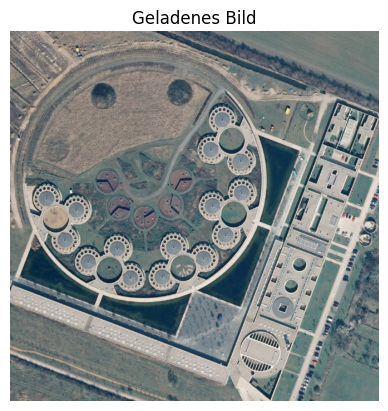

In [7]:
img_pil, img_arr = load_image_from_url(IMAGE_URL)

plt.imshow(img_arr)
plt.title("Geladenes Bild")
plt.axis("off")
plt.show()

## 7. RGB-Kanäle und Patch-Funktionen ausprobieren

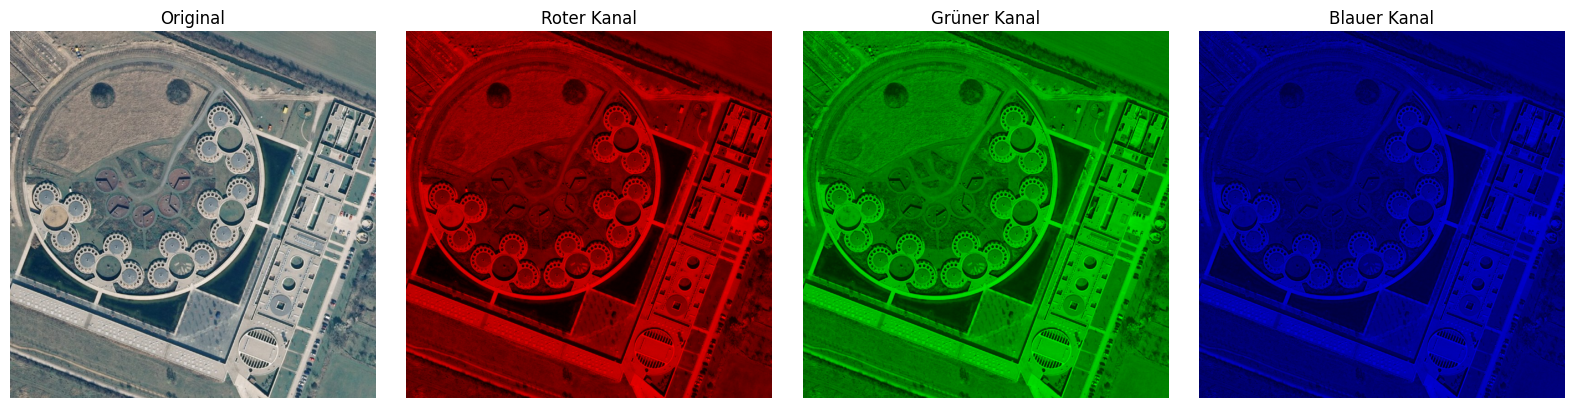

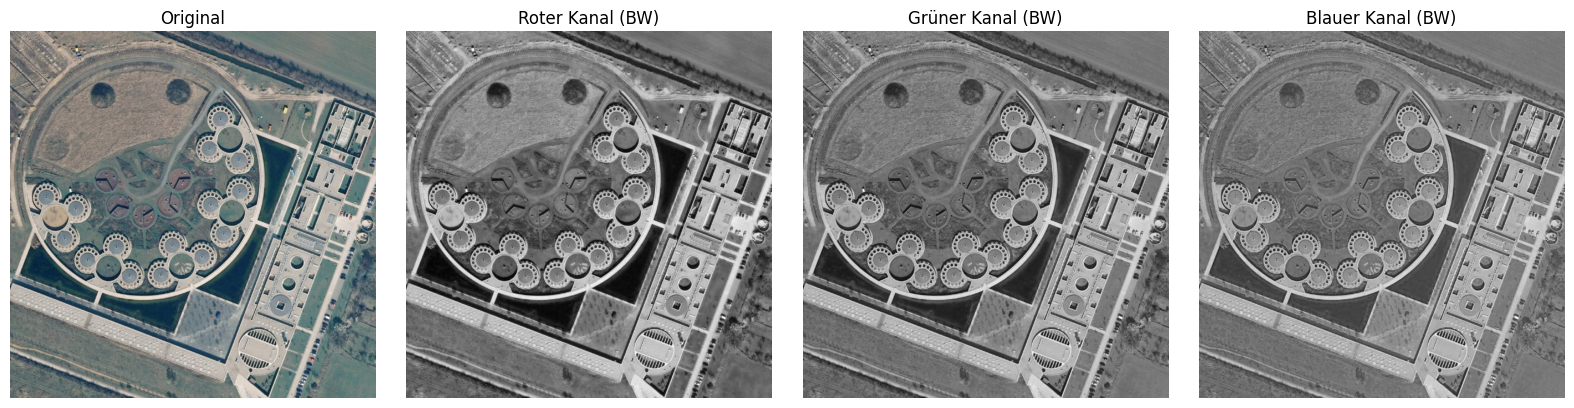

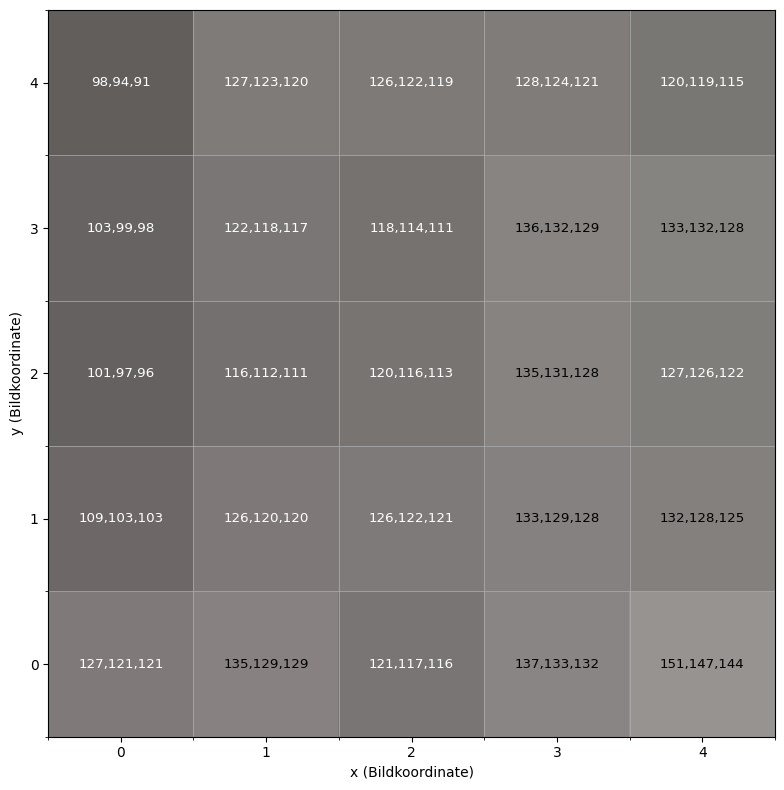

In [10]:
# 1) RGB-Kanäle farbig nebeneinander
plot_rgb_channels_from_array(img_arr, bw=False)

# 2) RGB-Kanäle in Schwarz-Weiß
plot_rgb_channels_from_array(img_arr, bw=True)

# 3) Standard-Patch: obere linke 10x10 Pixel
plot_patch_with_rgb_values(img_arr, x0=0, y0=0, patch_size=5, figsize=(8, 8))